In [26]:
import numpy as np
import astropy.io.fits
import matplotlib.pyplot as plt
import scipy as sym 
import scipy.integrate as integrate
from scipy import log,exp,sqrt,stats
from astropy import units as u
import astropy.constants as const
from scipy.optimize import curve_fit
from astropy.stats import biweight_location, biweight_scale, bootstrap
from astropy.cosmology import LambdaCDM
c=const.c.to("km/s")
%matplotlib inline

cosmos = LambdaCDM(H0=67.77* u.km / u.Mpc / u.s, Om0=0.307115, Ode0=0.692885)  # define cosmology on the basis of simulation

In [2]:
my_file=astropy.io.fits.open('Most_massive_MD04.fits')
my_file.info()

Filename: Most_massive_MD04.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (5429,)   uint8   
  1  Joined        1 BinTableHDU    191   478R x 87C   [E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, K, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, J, D]   


In [3]:
data= my_file[1].data

In [4]:
r=data.field('separation')

In [5]:
t=data.field('HALO_x_2')+data.field('HALO_y_2')+data.field('HALO_z_2')

In [6]:
ra=data.field('RA_2')
dec=data.field('DEC_2')
c1=ra*(np.pi/180)
c2=dec*(np.pi/180)
ra_cl=data.field('RA_1')[0]*np.pi/180
dec_cl=data.field('DEC_1')[0]*np.pi/180 #    -4.63883*np.pi/180

In [7]:
data.field('RA_1')[0]
data.field('DEC_1')[0]

-4.6388335

In [8]:
xy=np.sin(data.field('DEC_2'))*np.sin(data.field('DEC_1')[0])


In [9]:
yz=np.cos(data.field('DEC_2'))*np.cos(data.field('DEC_1')[0])


In [10]:
zx=np.cos(data.field('DEC_2')-data.field('RA_1')[0])


In [11]:
# Angular separation between two galaxy members inside the cluster. by using haversine method one can get the 
#separation between galaxies from their ra and dec.
ra_gal = c1     # ra odf the the galaxies in radian
dec_gal = np.pi/2. -c2  #dec of a galaxies in radian
ra_cl = ra_cl
dec_cl = np.pi/2. - (dec_cl)
y = 2*np.arcsin(np.sqrt(np.sin((dec_cl-dec_gal)/2.0)**2.0 +np.sin(dec_cl)*np.sin(dec_gal)*np.sin((ra_cl-ra_gal)/2.0)**2.0))

In [12]:
import astropy.units as u
from astropy.coordinates import SkyCoord
A=(SkyCoord(data.field('RA_2')*u.degree, data.field('DEC_2')*u.degree)) #c1 refers to the galaxies coordinates
B=(SkyCoord(data.field('RA_1')[0]*u.degree,data.field('DEC_1')[0]*u.degree)) #c2 refers to the co-ordinates of whole cluster
sep = A.separation(B)
x=sep.radian

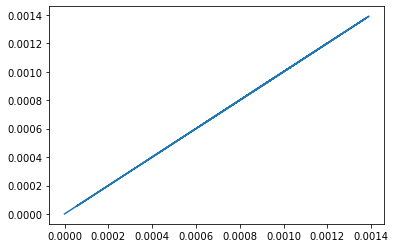

In [13]:
plt.plot(x,y)

In [14]:
# Redshift at the center of the cluster
data.redshift_R_1[0]

0.33398816

In [15]:
D=cosmos.comoving_distance(0.33398816) #angular diameter distance
D

<Quantity 1359.11821884 Mpc>

In [16]:
cosmos.angular_diameter_distance(0.33398816)


<Quantity 1018.83829227 Mpc>

In [17]:
np.sort(x*D)

<Quantity [0.        , 0.05305674, 0.07227543, 0.09736433, 0.14582372,
           0.16453621, 0.16720255, 0.17600578, 0.17627111, 0.17811893,
           0.20756218, 0.21089102, 0.22413562, 0.22453074, 0.23864916,
           0.25696567, 0.2606871 , 0.2763704 , 0.27685624, 0.28069547,
           0.2853689 , 0.28679523, 0.29565755, 0.29963657, 0.30833665,
           0.32112038, 0.3221009 , 0.32463846, 0.32593134, 0.32953507,
           0.33959126, 0.3415112 , 0.3466112 , 0.34910312, 0.35158154,
           0.3553817 , 0.36774474, 0.36816698, 0.36870998, 0.374034  ,
           0.3818032 , 0.3819669 , 0.3833779 , 0.3883209 , 0.39075586,
           0.397048  , 0.3979052 , 0.40161815, 0.40335953, 0.40494925,
           0.40737718, 0.4193176 , 0.4301999 , 0.4333061 , 0.43832323,
           0.4388141 , 0.45070285, 0.45296374, 0.45710102, 0.45748496,
           0.46132076, 0.46453795, 0.46495086, 0.47221568, 0.47857875,
           0.48072016, 0.48208594, 0.49698797, 0.49824885, 0.50111866,
      

In [18]:
z=data.redshift_R_2

In [19]:
import causticpy
from __future__ import division
caustic=causticpy.Caustic()


In [20]:
import numpy as np
from scipy import integrate

# speed of light
C = 299792.458  # km/s
class Cosmology(object):
    """   using  Hogg, D., 1999. arXiv:astro-ph/9905116v4
    """
    def __init__(self, OmegaM=0.307115, h=0.6777):
        # for now, we'll implement only
        # a flat cosmology for simplicity
        self.OmegaK = 0.0
        self.OmegaM = OmegaM
        self.OmegaL = 1. - OmegaM

        # Hubble constant, km/s/Mpc
        self.H0 = h * 100

        # Hubble Distance, Mpc
        self.DH = C / self.H0

    def Energy_den(self, z):
        #energy density eqn 14
        return 1.0/np.sqrt(self.OmegaM*(1.0+z)**3.0 + self.OmegaK \
                        *(1.0+z)**2.0 + self.OmegaL)

    def DC(self, z): # line of sight comoving distance
        
        # Compute the comoving distance in Mpc using scipy.integrate.quad
        # following Eqn 15
        return self.DH * integrate.quad(self.Energy_den,0,z)[0]

    def DM(self, z):
                # Compute the transverse comoving distance in Mpc (Eqn 16)
        if self.OmegaK > 0.0:
            return self.DH / np.sqrt(self.OmegaK) * \
                    np.sinh(np.sqrt(self.OmegaK)*self.DC(z)/self.DH)
        elif self.OmegaK == 0.0:
            return self.DC(z)
        elif self.OmegaK < 0.0:
            return self.DH / np.sqrt(np.abs(self.OmegaK)) * \
                    np.sin(np.sqrt(np.abs(self.OmegaK))*self.DC(z)/self.DH)

    def DA(self, z):
        
        # Compute the Angular Diameter distance in Mpc (Eqn 18)
        return self.DM(z) / (1.0+z)
    
cosmo = Cosmology()

In [21]:
cosmo.DA(0.33398816) #angular diameter distance

1018.8382922708196

In [22]:
cosmo.DM(data.redshift_R_1[0]) # transverse comoving distance

1359.1182184541597

In [23]:
cosmo.DC(0.33398816)

1359.118218843893

In [24]:
r_proj=(x*D)
np.sort(r_proj)

<Quantity [0.        , 0.05305674, 0.07227543, 0.09736433, 0.14582372,
           0.16453621, 0.16720255, 0.17600578, 0.17627111, 0.17811893,
           0.20756218, 0.21089102, 0.22413562, 0.22453074, 0.23864916,
           0.25696567, 0.2606871 , 0.2763704 , 0.27685624, 0.28069547,
           0.2853689 , 0.28679523, 0.29565755, 0.29963657, 0.30833665,
           0.32112038, 0.3221009 , 0.32463846, 0.32593134, 0.32953507,
           0.33959126, 0.3415112 , 0.3466112 , 0.34910312, 0.35158154,
           0.3553817 , 0.36774474, 0.36816698, 0.36870998, 0.374034  ,
           0.3818032 , 0.3819669 , 0.3833779 , 0.3883209 , 0.39075586,
           0.397048  , 0.3979052 , 0.40161815, 0.40335953, 0.40494925,
           0.40737718, 0.4193176 , 0.4301999 , 0.4333061 , 0.43832323,
           0.4388141 , 0.45070285, 0.45296374, 0.45710102, 0.45748496,
           0.46132076, 0.46453795, 0.46495086, 0.47221568, 0.47857875,
           0.48072016, 0.48208594, 0.49698797, 0.49824885, 0.50111866,
      

In [43]:
z_cluster=np.mean(z)


In [44]:
np.sin(x/2)

array([0.00000000e+00, 2.40562978e-04, 3.41891602e-04, 4.93420172e-04,
       4.24464582e-04, 1.01672696e-04, 2.47946562e-04, 1.90854757e-04,
       6.79631543e-04, 6.43031672e-04, 4.56495938e-04, 6.07891183e-04,
       3.74010939e-04, 2.70161603e-04, 1.24930739e-04, 2.73124286e-04,
       2.06802273e-04, 3.78630473e-04, 1.82834716e-04, 4.41693643e-04,
       3.25097702e-04, 2.13083724e-04, 4.79792652e-04, 6.01587351e-04,
       1.25637045e-04, 2.92437442e-04, 2.40953217e-04, 5.35950880e-04,
       4.48832376e-04, 5.96498663e-04, 1.61433389e-04, 6.84915402e-04,
       3.93615977e-04, 2.10662256e-04, 3.21368483e-04, 6.07558701e-04,
       4.04409773e-04, 1.47749539e-04, 2.09525853e-04, 3.33615084e-04,
       4.50872845e-04, 4.67012840e-04, 1.49868196e-04, 4.62621887e-04,
       5.10350277e-04, 2.73457641e-04, 5.94726764e-04, 5.58972533e-04,
       3.68895446e-04, 6.40079204e-04, 2.70922086e-04, 5.45678427e-04,
       4.34294954e-04, 5.24498813e-04, 2.21550654e-04, 2.13136766e-04,
      

In [48]:
H0=67.77
p=(c/H0)*(z+z_cluster)*np.sin(x/2)
np.sort(p)

<Quantity [0.        , 0.05768209, 0.07858429, 0.10585067, 0.1585363 ,
           0.17890845, 0.18170278, 0.19145873, 0.19168974, 0.19373047,
           0.22569938, 0.22918266, 0.24380708, 0.24401884, 0.25946432,
           0.27936104, 0.2834551 , 0.30044603, 0.3011593 , 0.3051445 ,
           0.31003162, 0.3117762 , 0.32138634, 0.32571596, 0.33511445,
           0.3491314 , 0.3503035 , 0.35297862, 0.35456476, 0.35806593,
           0.36933568, 0.37105379, 0.3769616 , 0.379535  , 0.38237652,
           0.3863747 , 0.3998577 , 0.40039572, 0.40060836, 0.40665752,
           0.41517767, 0.41529873, 0.4167809 , 0.4221687 , 0.42489785,
           0.43183067, 0.43257985, 0.43669745, 0.43866122, 0.44013965,
           0.44298342, 0.45602483, 0.467651  , 0.47107634, 0.47680634,
           0.47716516, 0.49032748, 0.49234694, 0.497111  , 0.49739224,
           0.50185376, 0.5050046 , 0.5055894 , 0.51322895, 0.52059716,
           0.5222715 , 0.524026  , 0.54014426, 0.5419985 , 0.5450379 ,
      

In [55]:
np.sqrt(z_cluster**2-z**2)

array([0.00550874,        nan,        nan,        nan, 0.00985411,
       0.00650762, 0.01791525,        nan, 0.00292969, 0.01090669,
              nan,        nan, 0.01476975, 0.00830437,        nan,
              nan,        nan,        nan, 0.01250193, 0.01614285,
       0.01376827, 0.01678411,        nan,        nan, 0.0170796 ,
       0.00594647, 0.00328571,        nan, 0.01586773, 0.0125067 ,
              nan,        nan, 0.00098037,        nan,        nan,
       0.01346652, 0.01153451,        nan,        nan, 0.0170475 ,
              nan, 0.00785862,        nan, 0.01301667, 0.01135516,
              nan,        nan, 0.01253615, 0.01058252,        nan,
       0.0134133 , 0.01052887, 0.00909895,        nan,        nan,
       0.01007986, 0.01373196, 0.01513819,        nan,        nan,
       0.00945316,        nan,        nan,        nan, 0.00283272,
       0.00371463,        nan,        nan, 0.01027822, 0.00424271,
       0.00858016,        nan,        nan,        nan, 0.01390

In [57]:
np.sort((c/H0)*(z-z_cluster))

<Quantity [-2.15472412e+00, -2.12677479e+00, -2.12295151e+00,
           -1.93284440e+00, -1.92559350e+00, -1.91135514e+00,
           -1.90871847e+00, -1.86653101e+00, -1.83502221e+00,
           -1.82197046e+00, -1.73324502e+00, -1.73232222e+00,
           -1.72652137e+00, -1.72375286e+00, -1.71650183e+00,
           -1.71017373e+00, -1.70845985e+00, -1.66811812e+00,
           -1.64979303e+00, -1.61657035e+00, -1.61142874e+00,
           -1.57293272e+00, -1.54920232e+00, -1.54564273e+00,
           -1.53483224e+00, -1.53404117e+00, -1.53179991e+00,
           -1.51822090e+00, -1.48803043e+00, -1.47366035e+00,
           -1.46271801e+00, -1.44518387e+00, -1.38243008e+00,
           -1.34722984e+00, -1.34327483e+00, -1.33470547e+00,
           -1.30899751e+00, -1.28144383e+00, -1.27129245e+00,
           -1.25573587e+00, -1.24914408e+00, -1.24294782e+00,
           -1.22791851e+00, -1.22541356e+00, -1.20128763e+00,
           -1.19179547e+00, -1.19126809e+00, -1.18467629e+00,
        

In [ ]:
cl_ra=data.field('RA_1')[0]
cl_dec=data.field('DEC_1')[0]

In [ ]:
d_dec = (dec - cl_dec)
d_ra = (ra - cl_ra)
theta = np.arctan2(d_dec,d_ra) 
deg = np.sqrt(d_ra ** 2 + d_dec ** 2) * np.pi/180 # in radians
act_r=deg*D
np.sort(act_r)

In [ ]:
cosmos.angular_diameter_distance(z)
from scipy.interpolate import interp1d

In [ ]:
d_C = cosmos.comoving_distance(data.redshift_R_2)
dc_mpc = (d_C).value
dc_interpolation = interp1d(data.redshift_R_2, dc_mpc)
z_interpolation = interp1d(dc_mpc, data.redshift_R_2)
#rr= dc_interpolation( z )
dc_mpc = (d_C).value

In [ ]:
D_cl=cosmos.comoving_distance(z) #angular diameter distance
D_cl

In [ ]:
""" For the whole members  he actual estimation
"""

d_C = D_cl
dc_mpc = (d_C).value
dc_interpolation = interp1d(z, dc_mpc)
z_interpolation = interp1d(dc_mpc, z)
#rr= dc_interpolation( z )
dc_mpc = (d_C).value
phi   = ( ra   - 180 ) * np.pi / 180.
theta = (dec + 90 ) * np.pi / 180.
rr    = dc_interpolation(z)
xx = rr * np.cos( phi) * np.sin( theta )
yy = rr * np.sin( phi) * np.sin( theta )
zz = rr * np.cos( theta )


In [ ]:
d_x = cosmos.comoving_distance(data.redshift_R_1[0])
dx_mpc = (d_x).value
r1=dx_mpc

phi1   = ( data.field('RA_1')[0]   - 180 ) * np.pi / 180.
theta1 = (data.field('DEC_1')[0] + 90 ) * np.pi / 180.

x1 = r1 * np.cos( phi1) * np.sin( theta1 )
y1 = r1 * np.sin( phi1) * np.sin( theta1 )
z1 = r1 * np.cos( theta1 )


In [ ]:
phi1   = ( data.field('RA_1')[0]   - 180 ) * np.pi / 180.
theta1 = (data.field('DEC_1')[0] + 90 ) * np.pi / 180.
x1 = r1 * np.cos( phi1) * np.sin( theta1 )
y1 = r1 * np.sin( phi1) * np.sin( theta1 )
z1 = r1 * np.cos( theta1 )

In [ ]:
d_dec = (dec - cl_dec)
d_ra = (ra - cl_ra)
theta = np.arctan2(d_dec,d_ra) 
deg = np.sqrt(d_ra ** 2 + d_dec ** 2) * np.pi/180 # in radians
act_r=deg*D
tt=np.sort(act_r)

In [ ]:
dis =np.sqrt((x1-xx)**2 + (y1-yy)**2 + (z1-zz)**2)


In [ ]:
bb=np.sqrt(np.sort(rr**2+r1**2-(2*rr*r1)*(np.sin(theta)*np.sin(theta1)*np.cos(phi-phi1)+np.cos(theta)*np.cos(theta1))))
#np.sort(bb)

In [ ]:
dis

In [ ]:
%matplotlib inline
plt.plot(r,dis)

In [ ]:
zs=np.array(rr**2+r1**2)-(2*rr*r1)*[np.sin(theta)*np.sin(theta1)*np.cos(phi)*np.cos(phi1)+np.sin(theta)*np.sin(theta1)*np.sin(phi)*np.sin(phi1)+np.cos(theta)*np.cos(theta1)]


In [ ]:
distance=np.sqrt(rr**2+r1**2-2*rr*r1*np.cos(theta-theta1)-2*rr*r1*np.sin(theta)*np.sin(theta1)*(np.cos(phi-phi1)-1))


In [ ]:
D

In [ ]:
   
antheta = np.sqrt(((dec - cl_dec)**2 + (ra- cl_ra)**2*np.cos(cl_dec*np.pi/180)))*np.pi/180
    
phi = np.arctan((dec - cl_dec)/((cl_ra - ra)*np.cos(cl_dec*np.pi/180)))
    
x_center = D * antheta * np.cos(phi) #in Mpc
    
y_center = D * antheta* np.sin(phi) #in Mpc
x_center

In [ ]:
np.sort(x_center)
np.sort(y_center)

In [ ]:
N,R=np.histogram(np.array(r_proj))
R

In [ ]:
nn,rs=np.histogram(np.array(act_r))
rs

In [ ]:


#Getting the number density profile in 2D 
n=N/(np.pi*(( R[1:]**2-R[:-1]**2)))

# central point of each separation 
R_proj = (R[1:] + R[:-1])/2
plt.plot(R_proj,n, color='black', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('projected separation(Mpc)')
plt.ylabel('number density (Mpc^-2)')  
plt.show()


In [ ]:
Ns,ry=np.histogram(r)

In [ ]:
#Ns,rs=np.histogram(r)
number_density=Ns/(np.pi*( 4* ( ry[1:]**3-ry[:-1]**3) / 3))
number_density
r_diff = (ry[1:] + ry[:-1])/2.
#plt.xscale('log')
#plt.yscale('log')
plt.plot(r_diff,number_density, color='black', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
plt.xlabel('Separation in MPC')
plt.ylabel('number_dneisty')
plt.show()

In [ ]:
#Ns,rs=np.histogram(r)
number_density=nn/(np.pi*( 4* ( rs[1:]**3-rs[:-1]**3) / 3))
number_density
r_act = (rs[1:] + rs[:-1])/2.
#plt.xscale('log')
#plt.yscale('log')
plt.plot(r_act,number_density, color='black', linestyle='dashed', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
plt.xlabel('Separation in MPC')
plt.ylabel('number_dneisty')
plt.show()

In [ ]:
dndR=np.array(np.gradient(n,R_proj))
dndR

In [ ]:
xx=np.hstack((np.array([0]),np.array(R_proj)))
xx

In [ ]:
yy=np.hstack((np.array(dndR[0]),np.array(dndR)))
yy

In [ ]:
#inter1=interp1d(xx,yy)

In [ ]:
inter1=interp1d(xx, yy, bounds_error=False, fill_value=-10.)

In [ ]:
inter1(-6.0)

In [ ]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

integrate.quad(nu, rs[9], 1.79,args=(rs[9]))[0]


In [ ]:

def nu(R,rs):
    return (-1/np.pi)*(inter1(R)/((R**2 - rs**2)**0.5))

nu_all=[integrate.quad(nu, rs_i, 1.6,args=(rs_i))[0] for rs_i in rs]
nu_all

In [ ]:
plt.plot(dec,ra,color='black', linestyle='none', linewidth = 2, marker='.', markerfacecolor='blue', markersize=12)
plt.xlabel('Dec')
plt.ylabel('RA')

In [ ]:
# Peculiar velocities of a members from there spectrosocpic
# redshift and mean redshift of a cluster

c=const.c.to("km/s")
z_cl=0.33398816
los_v=( c*z -  c*z_cl)/(1 + z_cl)
los_v
plt.plot(r,los_v, color='black', linestyle='none', linewidth = 2, marker='o', markerfacecolor='green', markersize=12)
plt.xlabel('Separation in MPC')
plt.ylabel('velocity dispersion')
plt.show()

In [ ]:
z=data.redshift_R_2

In [ ]:
v=np.sqrt(data.HALO_vx_2**2+data.HALO_vy_2**2+data.HALO_vz_2**2)
v

In [ ]:
(np.vstack((data.field('RA_2'),data.field('DEC_2'),data.redshift_R_2)).T)

In [ ]:
import causticpy
caustic= causticpy.Caustic()
caustic.run_caustic(np.vstack((data.field('RA_2'),data.field('DEC_2'),data.redshift_R_2)).T)
